In [21]:
# Libraries

# data analysis and mining

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm

# Visualization

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Machine learning

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import sklearn.feature_selection as fs
from sklearn import metrics
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error

# Importing the data file

In [22]:
pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84_2020.csv') 

Order  Property Id           Property Name  \
0          1         7365                    1155   
1          2         8139                     200   
2          3         8604                     114   
3          4         8841                     733   
4          5        11809     Conde Nast Building   
...      ...          ...                     ...   
28802  28803     12915538         266 47th Street   
28803  28804     12915541                 Rear(?)   
28804  28805     12915563   34-01 STEINWAY STREET   
28805  28806     12926435   Start: 937 Fulton St.   
28806  28807     12926436  Start: 119 W 124th St.   

                        Parent Property Id  \
0      Not Applicable: Standalone Property   
1      Not Applicable: Standalone Property   
2      Not Applicable: Standalone Property   
3      Not Applicable: Standalone Property   
4      Not Applicable: Standalone Property   
...                                    ...   
28802  Not Applicable: Standalone Property   
28803                              6118341   
28804  Not Applicable: Standalone Property   
28805  Not Applicable: Standalone Property   
28806  Not Applicable: Standalone Property   

                      Parent Property Name City Building BBL - 10 digits  \
0      Not Applicable: Standalone Property            No      1009970029   
1      Not Applicable: Standalone Property            No      1013150001   
2      Not Applicable: Standalone Property            No      1009990019   
3      Not Applicable: Standalone Property            No      1013190047   
4      Not Applicable: Standalone Property            No      1009950005   
...                                    ...           ...             ...   
28802  Not Applicable: Standalone Property           NaN      3007630034   
28803             Riverdale Country School           NaN      2058363127   
28804  Not Applicable: Standalone Property           NaN      4006730016   
28805  Not Applicable: Standalone Property           NaN      3019780001   
28806  Not Applicable: Standalone Property           NaN      1019090022   

      NYC Borough, Block and Lot (BBL) self-reported  \
0                                         1009970029   
1                                         1013150001   
2                                         1009990019   
3                                         1013190047   
4                                         1009950005   
...                                              ...   
28802                                     3007630034   
28803                                     2058363127   
28804                                     4006730016   
28805                                     3019780001   
28806                                     1019090022   

      NYC Building Identification Number (BIN)  \
0                                      1022631   
1                                      1037545   
2                                      1022667   
3                                      1037596   
4                                      1085682   
...                                        ...   
28802                                  3396951   
28803                                  2113340   
28804                                  4430185   
28805                                  3056631   
28806                                  1057822   

             Address 1 (self-reported)  ...  \
0      1155  Avenue  of  the  Americas  ...   
1                 200  East  42nd  St.  ...   
2                  114  West  47th  st  ...   
3                   733  Third  Avenue  ...   
4                       4 Times Square  ...   
...                                ...  ...   
28802                  266 47th Street  ...   
28803        5260 Fieldston Road Bronx  ...   
28804            34-01 STEINWAY STREET  ...   
28805                937 Fulton Street  ...   
28806            119 West 124th Street  ...   

      Water Use (All Water Sources) (kgal)  \
0                  

In [23]:
df = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84_2020.csv')

# Understanding the data

In [24]:
df.head(5)

Order  Property Id        Property Name  \
0      1         7365                 1155   
1      2         8139                  200   
2      3         8604                  114   
3      4         8841                  733   
4      5        11809  Conde Nast Building   

                    Parent Property Id                 Parent Property Name  \
0  Not Applicable: Standalone Property  Not Applicable: Standalone Property   
1  Not Applicable: Standalone Property  Not Applicable: Standalone Property   
2  Not Applicable: Standalone Property  Not Applicable: Standalone Property   
3  Not Applicable: Standalone Property  Not Applicable: Standalone Property   
4  Not Applicable: Standalone Property  Not Applicable: Standalone Property   

  City Building BBL - 10 digits  \
0            No      1009970029   
1            No      1013150001   
2            No      1009990019   
3            No      1013190047   
4            No      1009950005   

  NYC Borough, Block and Lot (BBL) self-reported  \
0                                     1009970029   
1                                     1013150001   
2                                     1009990019   
3                                     1013190047   
4                                     1009950005   

  NYC Building Identification Number (BIN)        Address 1 (self-reported)  \
0                                  1022631  1155  Avenue  of  the  Americas   
1                                  1037545             200  East  42nd  St.   
2                                  1022667              114  West  47th  st   
3                                  1037596               733  Third  Avenue   
4                                  1085682                   4 Times Square   

   ... Water Use (All Water Sources) (kgal)  \
0  ...                        Not Available   
1  ...                               7310.6   
2  ...                        Not Available   
3  ...                        Not Available   
4  ...                        Not Available   

  Water Use Intensity (All Water Sources) (gal/ft²) Water Required  \
0                                     Not Available             No   
1                                             19.02            Yes   
2                                     Not Available             No   
3                                     Not Available             No   
4                                     Not Available             No   

  Generation Date   Latitude  Longitude Community Board Council District  \
0      05/28/2020  40.756631 -73.982826           105.0              4.0   
1      05/28/2020  40.750698 -73.974306           106.0              4.0   
2      05/28/2020  40.758310 -73.982504           105.0              4.0   
3      05/28/2020  40.753074 -73.972753           106.0              4.0   
4      05/28/2020  40.756181 -73.986244           105.0              4.0   

  Census Tract                      NTA  
0        119.0    Midtown-Midtown South  
1         88.0  Turtle Bay-East Midtown  
2        125.0    Midtown-Midtown South  
3         90.0  Turtle Bay-East Midtown  
4        119.0    Midtown-Midtown South  

[5 rows x 67 columns]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28807 entries, 0 to 28806
Data columns (total 67 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       28807 non-null  int64  
 1   Property Id                                                 28807 non-null  int64  
 2   Property Name                                               28807 non-null  object 
 3   Parent Property Id                                          28807 non-null  object 
 4   Parent Property Name                                        28807 non-null  object 
 5   City Building                                               2597 non-null   object 
 6   BBL - 10 digits                                             28807 non-null  object 
 7   NYC Borough, Block and Lot (BBL) self-reported              28807 non-null  object 
 

# Cleaning the data

In [26]:
# Dealing with duplicates, incomplete data and null values. Some of the features are the same, just different in units (metric to imperial units), thus one of the duplicates will be removed. Some Columns have more than 90% null values. Some features have no relation to the target variable.

df = df.drop(['Order', 
              'BBL - 10 digits',
              'Property Name',
              'Parent Property Id',
              'Parent Property Name',
              'Borough',
              'City Building',
              'NYC Borough, Block and Lot (BBL) self-reported',
              'Address 1 (self-reported)',
              'Address 2 (self reported)',
              'Street Number',
              'Self-Reported Gross Floor Area (ft²)',
              'List of All Property Use Types at Property',
              'Largest Property Use Type - Gross Floor Area (ft²)',
              '2nd Largest Property Use Type',
              '2nd Largest Property Use - Gross Floor Area (ft²)',
              '3rd Largest Property Use Type',
              '3rd Largest Property Use Type - Gross Floor Area (ft²)',
              'Fuel Oil #1 Use (kBtu)',
              'Fuel Oil #2 Use (kBtu)',
              'Fuel Oil #4 Use (kBtu)',
              'Fuel Oil #5 & 6 Use (kBtu)',
              'Diesel #2 Use (kBtu)',
              'Kerosene Use (kBtu)',
              'Propane Use (kBtu)',
              'District Steam Use (kBtu)',
              'District Hot Water Use (kBtu)',
              'District Chilled Water Use (kBtu)',
              'Electricity Use - Grid Purchase (kBtu)',
              'Annual Maximum Demand (kW)',
              'Annual Maximum Demand (MM/YYYY)',
              'Generation Date'
             ], axis=1)

In [27]:
df = df.replace('Not Available', None)

In [28]:
df

Property Id NYC Building Identification Number (BIN) Postal Code  \
0             7365                                  1022631       10036   
1             8139                                  1037545       10017   
2             8604                                  1022667       10036   
3             8841                                  1037596       10017   
4            11809                                  1085682       10036   
...            ...                                      ...         ...   
28802     12915538                                  3396951       11220   
28803     12915541                                  2113340       10471   
28804     12915563                                  4430185       11101   
28805     12926435                                  3056631       11238   
28806     12926436                                  1057822       10027   

                  Street Name DOF Gross Floor Area (ft²)  \
0      Avenue of the Americas                    734,668   
1               East 42nd St.                    380,000   
2                West 47th st                    646,995   
3                Third Avenue                    405,399   
4                Times Square                  1,642,675   
...                       ...                        ...   
28802             47th Street                     25,500   
28803    Fieldston Road Bronx                     55,584   
28804         STEINWAY STREET                    112,174   
28805           Fulton Street                     27,450   
28806       West 124th Street                     27,000   

      Primary Property Type - Self Selected Largest Property Use Type  \
0                                    Office                    Office   
1                                    Office                    Office   
2                          Financial Office          Financial Office   
3                                    Office                    Office   
4                                    Office                    Office   
...                                     ...                       ...   
28802                   Distribution Center       Distribution Center   
28803                           K-12 School               K-12 School   
28804                   Multifamily Housing       Multifamily Housing   
28805                        Medical Office            Medical Office   
28806                        Medical Office            Medical Office   

      Year Built  Number of Buildings  Occupancy  ...  \
0          1,982                    1         55  ...   
1          1,956                    1        100  ...   
2          1,989                    1         95  ...   
3          1,961                    1        100  ...   
4          1,999                    1        100  ...   
...          ...                  ...        ...  ...   
28802      2,008                    1        100  ...   
28803      1,968                    1        100  ...   
28804      1,995                    1        100  ...   
28805      1,930                    1        100  ...   
28806      2,003                    1        100  ...   

      Indirect GHG Emissions (Metric Tons CO2e)  \
0                                        2747.2   
1                                        2752.2   
2                                        2987.6   
3                                        2799.8   
4                                       10170.9   
...                                         ...   
28802                                      57.3   
28803                                         0   
28804                                     138.9   
28805                                      80.6   
28806                                     139.6   

      Water Use (All Water Sources) (kgal)  \
0                            Not Available   
1                                   7310.6   
2                                   7310.6   
3                         

In [29]:
# Removing the character in the data.

df[['DOF Gross Floor Area (ft²)', 'Year Built']] = df[['DOF Gross Floor Area (ft²)', 'Year Built']].replace(',','', regex=True)

In [30]:
# Some numeric data are in Obj form, thus will be converted into int.

cols = ['NYC Building Identification Number (BIN)','Postal Code','DOF Gross Floor Area (ft²)','Year Built','ENERGY STAR Score','Source EUI (kBtu/ft²)','Weather Normalized Site EUI (kBtu/ft²)','Site EUI (kBtu/ft²)','Weather Normalized Source EUI (kBtu/ft²)','Weather Normalized Site Electricity Intensity (kWh/ft²)','Weather Normalized Site Natural Gas Intensity (therms/ft²)','Natural Gas Use (kBtu)','Weather Normalized Site Natural Gas Use (therms)','Electricity Use - Grid Purchase (kWh)','Weather Normalized Site Electricity (kWh)','Total GHG Emissions (Metric Tons CO2e)','Direct GHG Emissions (Metric Tons CO2e)','Indirect GHG Emissions (Metric Tons CO2e)','Water Use (All Water Sources) (kgal)','Water Use Intensity (All Water Sources) (gal/ft²)']

df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [31]:
df = df.dropna() #dropping rows null values

In [32]:
# convert float data to int

df[cols] = df[cols].astype('int')

In [33]:
# Cleaning outliers 

df = df[df['Year Built'] > 1600] # Oldest Building in Newyork started construction in 1600's 
df = df[df['Total GHG Emissions (Metric Tons CO2e)'] > 0.0] # GHG emission shouldnt have a negative value
df = df[df['Postal Code'] < 99999] # NYC postal code is a 5-digit number 
df = df[df['Water Use (All Water Sources) (kgal)'] <= 10e+06]
df = df[df['Weather Normalized Source EUI (kBtu/ft²)'] <= 100000]
df = df[df['Total GHG Emissions (Metric Tons CO2e)'] < 100000]
df = df[df['DOF Gross Floor Area (ft²)'] < 4000000]
df = df[df['Water Use (All Water Sources) (kgal)'] > 0] # Water Use, must be greater than 0

In [34]:
df

Property Id  NYC Building Identification Number (BIN)  Postal Code  \
2             8604                                   1022667        10036   
3             8841                                   1037596        10017   
4            11809                                   1085682        10036   
7            28404                                   1065045        10034   
8          1025339                                   1036162        10017   
...            ...                                       ...          ...   
28801     12915536                                   1084402        10034   
28802     12915538                                   3396951        11220   
28804     12915563                                   4430185        11101   
28805     12926435                                   3056631        11238   
28806     12926436                                   1057822        10027   

             Street Name  DOF Gross Floor Area (ft²)  \
2           West 47th st                      646995   
3           Third Avenue                      405399   
4           Times Square                     1642675   
7               Broadway                      393924   
8          Lexington Ave                      627691   
...                  ...                         ...   
28801  West 136th Street                       35082   
28802        47th Street                       25500   
28804    STEINWAY STREET                      112174   
28805      Fulton Street                       27450   
28806  West 124th Street                       27000   

       Primary Property Type - Self Selected  \
2                           Financial Office   
3                                     Office   
4                                     Office   
7      Hospital (General Medical & Surgical)   
8                                     Office   
...                                      ...   
28801                    Multifamily Housing   
28802                    Distribution Center   
28804                    Multifamily Housing   
28805                         Medical Office   
28806                         Medical Office   

                   Largest Property Use Type  Year Built  Number of Buildings  \
2                           Financial Office        1989                    1   
3                                     Office        1961                    1   
4                                     Office        1999                    1   
7      Hospital (General Medical & Surgical)        1991                    1   
8                                     Office        1987                    1   
...                                      ...         ...                  ...   
28801                    Multifamily Housing        1927                    1   
28802                    Distribution Center        2008                    1   
28804                    Multifamily Housing        1995                    1   
28805                         Medical Office        1930                    1   
28806                         Medical Office        2003                    1   

       Occupancy  ... Indirect GHG Emissions (Metric Tons CO2e)  \
2             95  ...                                      2987   
3            100  ...                                      2799   
4            100  ...                                     10170   
7            100  ...                                      2658   
8            100  ...                                      3604   
...          ...  ...                                       ...   
28801        100  ...                                        42   
28802        100  ...                                        57   
28804        100  ...                                       138   
28805        100  ...                                        80   
28806        100  ...                                       139   

      Water Use (All Water Sources) (kgal)  \
2       

In [35]:
df.describe(include=['O'])

Street Name Primary Property Type - Self Selected  \
count        21759                                 21759   
unique        7118                                    69   
top       Broadway                   Multifamily Housing   
freq           434                                 16264   

       Largest Property Use Type Metered Areas (Energy) Metered Areas (Water)  \
count                      21759                  21759                 21759   
unique                        68                      9                     5   
top          Multifamily Housing         Whole Property        Whole Property   
freq                       16285                  21736                 21747   

       Water Required                    NTA  
count           21759                  21759  
unique              2                    191  
top               Yes  Midtown-Midtown South  
freq            15953                   1010

# Exporatory Data Analysis

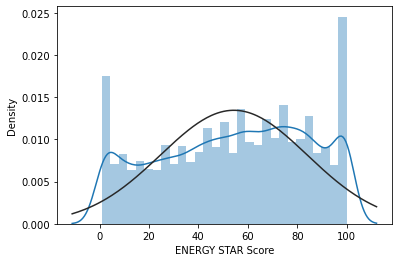

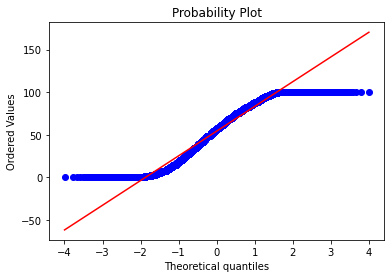

In [36]:
# Distribution Plot and Probability plot of the Energy Star Score

sns.distplot(df['ENERGY STAR Score'],fit=norm);
fig1 = plt.figure()
res = stats.probplot(df['ENERGY STAR Score'], plot=plt)

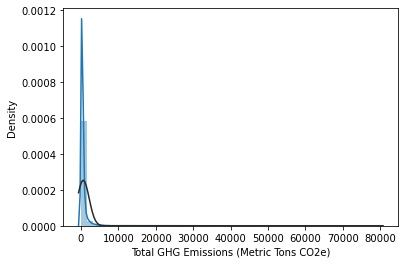

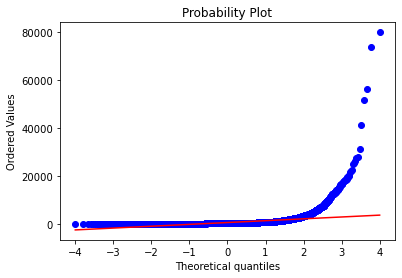

In [37]:
# Distribution Plot and Probability plot of the Total GHG Emissions (Metric Tons CO2e)

sns.distplot(df['Total GHG Emissions (Metric Tons CO2e)'],fit=norm);
fig2 = plt.figure()
res = stats.probplot(df['Total GHG Emissions (Metric Tons CO2e)'], plot=plt)

In [38]:
fig3 = px.scatter(df, x='Occupancy', y='Total GHG Emissions (Metric Tons CO2e)', title='Occupancy VS Total GHG', color_discrete_sequence=px.colors.sequential.RdBu)
fig3.show()

NB: As the occupancy increased, so did the Total GHG

In [39]:
fig4 = px.scatter(df, x='DOF Gross Floor Area (ft²)', y='Total GHG Emissions (Metric Tons CO2e)', title='Gross Floor Area VS Total GHG', color_discrete_sequence=px.colors.sequential.RdBu)
fig4.show()

NB: As the Gross floor area increases, there seem to be an increase in the Total GHG also.

In [40]:
Property = df[['Total GHG Emissions (Metric Tons CO2e)', 'Primary Property Type - Self Selected']]


Property_Rating = Property.groupby('Primary Property Type - Self Selected')[('Total GHG Emissions (Metric Tons CO2e)')].mean().reset_index(name='Total GHG Emissions (Metric Tons CO2e)')
Property_Rating = Property_Rating.sort_values(by='Total GHG Emissions (Metric Tons CO2e)', ascending=False)
Property_Rating_Highest = Property_Rating.head(10)
Property_Rating_Lowest = Property_Rating.tail(10)


fig5 = px.bar(Property_Rating_Highest, y='Total GHG Emissions (Metric Tons CO2e)', x='Primary Property Type - Self Selected', title='Property type with highest Total GHG. Emissions', color_discrete_sequence=px.colors.sequential.RdBu)
fig5.show()

In [41]:
fig6 = px.bar(Property_Rating_Lowest, y='Total GHG Emissions (Metric Tons CO2e)', x='Primary Property Type - Self Selected', title='Property type with lowest Total GHG. Emissions)', color_discrete_sequence=px.colors.sequential.RdBu)
fig6.show()

In [42]:
E_Star = df[['ENERGY STAR Score', 'Primary Property Type - Self Selected']]


E_Star_Rating = E_Star.groupby('Primary Property Type - Self Selected')[('ENERGY STAR Score')].mean().reset_index(name='ENERGY STAR Score')
E_Star_Rating = E_Star_Rating.sort_values(by='ENERGY STAR Score', ascending=False)
E_Star_Rating_Best = E_Star_Rating.head(10)
E_Star_Rating_Worst = E_Star_Rating.tail(10)


fig = px.bar(E_Star_Rating_Best, y='ENERGY STAR Score', x='Primary Property Type - Self Selected', title='Property Type with Best Energy STAR Score', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [43]:
fig = px.bar(E_Star_Rating_Worst, y='ENERGY STAR Score', x='Primary Property Type - Self Selected', title='Property type with Worst Energy STAR Score', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [44]:
Property_Type = df[['Primary Property Type - Self Selected']]
Property_Type = Property_Type.groupby('Primary Property Type - Self Selected').size().reset_index(name='Count')
Property_Type = Property_Type.sort_values(by='Count', ascending=False)
Property_Type_Top = Property_Type.head(10)
Property_Type_Least = Property_Type.tail(15)


fig = px.bar(Property_Type_Top, y='Count', x='Primary Property Type - Self Selected', title='Top 10 Property Use', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [45]:
fig = px.bar(Property_Type_Least, y='Count', x='Primary Property Type - Self Selected', title='Least Property Use', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [46]:
Electricity = df[['Electricity Use - Grid Purchase (kWh)', 'Primary Property Type - Self Selected']]


E_Use = Electricity.groupby('Primary Property Type - Self Selected')[('Electricity Use - Grid Purchase (kWh)')].mean().reset_index(name='Electricity Use - Grid Purchase (kWh)')
E_Use = E_Use.sort_values(by='Electricity Use - Grid Purchase (kWh)', ascending=False)
E_Use_Top = E_Use.head(10)
E_Use_Least = E_Use.tail(10)


fig = px.bar(E_Use_Top, y='Electricity Use - Grid Purchase (kWh)', x='Primary Property Type - Self Selected', title='Top 10 Electricity Users', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [47]:
fig = px.bar(E_Use_Least, y='Electricity Use - Grid Purchase (kWh)', x='Primary Property Type - Self Selected', title='Least 10 Electricity Users', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [48]:
Water = df[['Water Use (All Water Sources) (kgal)', 'Primary Property Type - Self Selected']]


Water_Use = Water.groupby('Primary Property Type - Self Selected')[('Water Use (All Water Sources) (kgal)')].mean().reset_index(name='Water Use (All Water Sources) (kgal)')
Water_Use = Water_Use.sort_values(by='Water Use (All Water Sources) (kgal)', ascending=False)
Water_Use_Top = Water_Use.head(10)
Water_Use_Least = Water_Use.tail(10)


fig = px.bar(Water_Use_Top, y='Water Use (All Water Sources) (kgal)', x='Primary Property Type - Self Selected', title='Top 10 Water Users', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [49]:
fig = px.bar(Water_Use_Least, y='Water Use (All Water Sources) (kgal)', x='Primary Property Type - Self Selected', title='Least 10 Water Users', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [50]:
#Creating a New Colum to capture the age of the buildings
df['Age'] = 2019 - df['Year Built']

In [51]:
Age_ = df[['Age', 'Primary Property Type - Self Selected']]


Age_Use = Age_.groupby('Primary Property Type - Self Selected')[('Age')].mean().reset_index(name='Age')
Age_Use = Age_Use.sort_values(by='Age', ascending=False)
Age_Use_Top = Age_Use.head(20)
Age_Use_Least = Age_Use.tail(10)


fig = px.bar(Age_Use_Top, y='Age', x='Primary Property Type - Self Selected', title='Oldest Building Use', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [52]:
fig = px.bar(Age_Use_Least, y='Age', x='Primary Property Type - Self Selected', title='Newest Building Use', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [53]:
fig = px.scatter(df, x='Electricity Use - Grid Purchase (kWh)', y='DOF Gross Floor Area (ft²)', title='Electricity Use VS Gross Floor Area', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [54]:
fig = px.scatter(df, y='Electricity Use - Grid Purchase (kWh)', x='Occupancy', title='Electricity Use VS Occupany', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [55]:
Size = df[['DOF Gross Floor Area (ft²)', 'Primary Property Type - Self Selected']]

Size_Use = Size.groupby('Primary Property Type - Self Selected')[('DOF Gross Floor Area (ft²)')].mean().reset_index(name='DOF Gross Floor Area (ft²)')
Size_Use = Size_Use.sort_values(by='DOF Gross Floor Area (ft²)', ascending=False)
Size_Use_Top = Size_Use.head(10)
Size_Use_Least = Size_Use.tail(10)


fig = px.bar(Size_Use_Top, y='DOF Gross Floor Area (ft²)', x='Primary Property Type - Self Selected', title='Building Use by Size (Largest)', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [56]:
fig = px.bar(Size_Use_Least, y='DOF Gross Floor Area (ft²)', x='Primary Property Type - Self Selected', title='Building Use by Size (Smallest)', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

# Data Preparation

# Target Variable

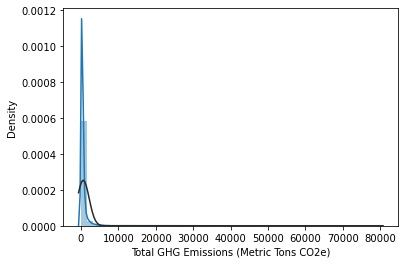

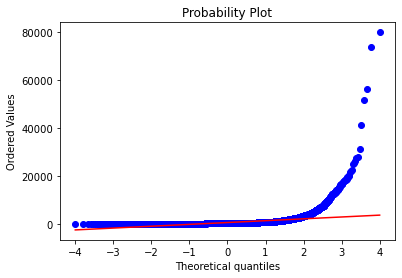

In [57]:
#Checking the distribution of the GHG emission

sns.distplot(df['Total GHG Emissions (Metric Tons CO2e)'],fit=norm);
fig = plt.figure()
res = stats.probplot(df['Total GHG Emissions (Metric Tons CO2e)'], plot=plt)

Log transform will be applied to make the target variable better distributed

In [58]:
Target_Var = df[['Total GHG Emissions (Metric Tons CO2e)']]

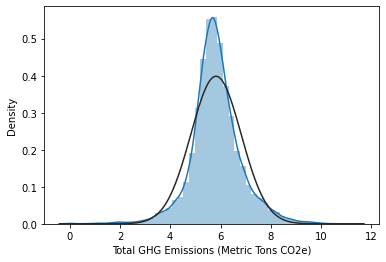

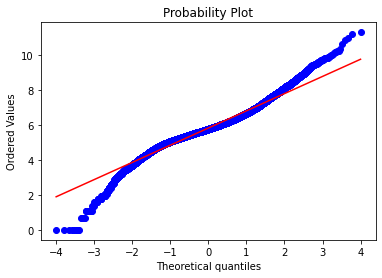

In [59]:
Target_Var['Total GHG Emissions (Metric Tons CO2e)'] = np.log(Target_Var['Total GHG Emissions (Metric Tons CO2e)'])
sns.distplot(Target_Var['Total GHG Emissions (Metric Tons CO2e)'],fit=norm);
fig = plt.figure()
res = stats.probplot(Target_Var['Total GHG Emissions (Metric Tons CO2e)'], plot=plt)

A better fit.

In [61]:
#Selecting features and the target variable

X = df.drop("Total GHG Emissions (Metric Tons CO2e)", 1).drop("Direct GHG Emissions (Metric Tons CO2e)",1).drop("Indirect GHG Emissions (Metric Tons CO2e)",1)   #Both Direct and Indirect GHG are related to the Total GHG, as they add up to give the Total GHG
y = Target_Var['Total GHG Emissions (Metric Tons CO2e)']  #Target Feature

# Pre-processing Categorical Features

In [62]:
# Converting object (categorical) feature into an int feature
# 0 = most common category, highest int = least common.

def getObjectFeature(df, col, datalength=21759):
    if df[col].dtype!='object': # if it's not categorical..
        print('feature',col,'is not an object feature.')
        return df
    elif len([i for i in df[col].T.notnull() if i == True])!=datalength: # if there's missing data..
        print('feature',col,'is missing data.')
        return df
    else:
        df1 = df
        counts = df1[col].value_counts() # get the counts for each label for the feature
        df1[col] = [counts.index.tolist().index(i) for i in df1[col]] # do the conversion
        return df1 # make the new (integer) column from the conversion

In [63]:
#Using the defined function (getObjectFeature) to convert Categorical data to Numeric

for col in list(X):
    if X[col].dtype=='object':
        X = getObjectFeature(X, col)
X.head(10)

Property Id  NYC Building Identification Number (BIN)  Postal Code  \
2          8604                                   1022667        10036   
3          8841                                   1037596        10017   
4         11809                                   1085682        10036   
7         28404                                   1065045        10034   
8       1025339                                   1036162        10017   
10      1045358                                   1035464        10022   
11      1052478                                   1001027        10005   
12      1069082                                   1016880        10010   
13      1143922                                   1000868        10005   
14      1143934                                   1082816        10013   

    Street Name  DOF Gross Floor Area (ft²)  \
2          3493                      646995   
3            18                      405399   
4           611                     1642675   
7             0                      393924   
8            71                      627691   
10            2                      656436   
11            0                     1141276   
12            7                     1159795   
13         6722                      990250   
14         3025                     1594289   

    Primary Property Type - Self Selected  Largest Property Use Type  \
2                                      29                         28   
3                                       1                          1   
4                                       1                          1   
7                                      22                         21   
8                                       1                          1   
10                                     29                         28   
11                                      1                          1   
12                                      1                          1   
13                                      1                          1   
14                                      1                          1   

    Year Built  Number of Buildings  Occupancy  ...  \
2         1989                    1         95  ...   
3         1961                    1        100  ...   
4         1999                    1        100  ...   
7         1991                    1        100  ...   
8         1987                    1        100  ...   
10        1994                    1        100  ...   
11        1967                    1         90  ...   
12        1928                    1        100  ...   
13        1968                    1         60  ...   
14        1986                    1        100  ...   

    Water Use (All Water Sources) (kgal)  \
2                                   7310   
3                                   7310   
4                                   7310   
7                                  24665   
8                                  16709   
10                                 21750   
11                                 17994   
12                                 17994   
13                                  4235   
14                                 21334   

    Water Use Intensity (All Water Sources) (gal/ft²)  Water Required  \
2                                                  19               1   
3                                                  19               1   
4                                                  19               1   
7                                                  79               0   
8                                                  24               1   
10                                                 30               1   
11                                                 14               1   
12                                                 14               1   
13                                                  4               1   
14                                                 11    

In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21759 entries, 2 to 28806
Data columns (total 33 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Property Id                                                 21759 non-null  int64  
 1   NYC Building Identification Number (BIN)                    21759 non-null  int32  
 2   Postal Code                                                 21759 non-null  int32  
 3   Street Name                                                 21759 non-null  int64  
 4   DOF Gross Floor Area (ft²)                                  21759 non-null  int32  
 5   Primary Property Type - Self Selected                       21759 non-null  int64  
 6   Largest Property Use Type                                   21759 non-null  int64  
 7   Year Built                                                  21759 non-null  int32  
 

In [65]:
#Checking correlations among variables

Corr = X.corr()
Corr

Property Id  \
Property Id                                            1.000000   
NYC Building Identification Number (BIN)               0.014767   
Postal Code                                            0.083388   
Street Name                                            0.060942   
DOF Gross Floor Area (ft²)                            -0.177221   
Primary Property Type - Self Selected                  0.046476   
Largest Property Use Type                              0.047089   
Year Built                                             0.059221   
Number of Buildings                                    0.010446   
Occupancy                                             -0.098411   
Metered Areas (Energy)                                 0.009819   
Metered Areas (Water)                                 -0.009787   
ENERGY STAR Score                                     -0.019714   
Source EUI (kBtu/ft²)                                  0.007391   
Weather Normalized Site EUI (kBtu/ft²)                -0.018342   
Site EUI (kBtu/ft²)                                    0.006043   
Weather Normalized Source EUI (kBtu/ft²)              -0.018632   
Weather Normalized Site Electricity Intensity (...     0.013281   
Weather Normalized Site Natural Gas Intensity (...     0.020012   
Natural Gas Use (kBtu)                                -0.065548   
Weather Normalized Site Natural Gas Use (therms)      -0.075078   
Electricity Use - Grid Purchase (kWh)                 -0.115051   
Weather Normalized Site Electricity (kWh)             -0.116838   
Water Use (All Water Sources) (kgal)                  -0.018030   
Water Use Intensity (All Water Sources) (gal/ft²)      0.022525   
Water Required                                         0.020159   
Latitude                                              -0.023221   
Longitude                                              0.023308   
Community Board                                        0.081100   
Council District                                       0.084925   
Census Tract                                          -0.013961   
NTA                                                    0.103286   
Age                                                   -0.059221   

                                                    NYC Building Identification Number (BIN)  \
Property Id                                                                         0.014767   
NYC Building Identification Number (BIN)                                            1.000000   
Postal Code                                                                         0.025767   
Street Name                                                                         0.011064   
DOF Gross Floor Area (ft²)                                                         -0.004360   
Primary Property Type - Self Selected                                               0.004725   
Largest Property Use Type                                                           0.004616   
Year Built                                                                          0.006547   
Number of Buildings                                                                 0.002042   
Occupancy                                                                           0.005343   
Metered Areas (Energy)                                                             -0.000245   
Metered Areas (Water)                                                               0.000120   
ENERGY STAR Score                                                                   0.000378   
Source EUI (kBtu/ft²)                                                               0.002430   
Weather Normalized Site EUI (kBtu/ft²)                                              0.000562   
Site EUI (kBtu/ft²)                                                                 0.002068   
Weather Normalized Source EUI (kBtu/ft²)                                            0.000739   
Weather Normalized Site Electricity Intensity

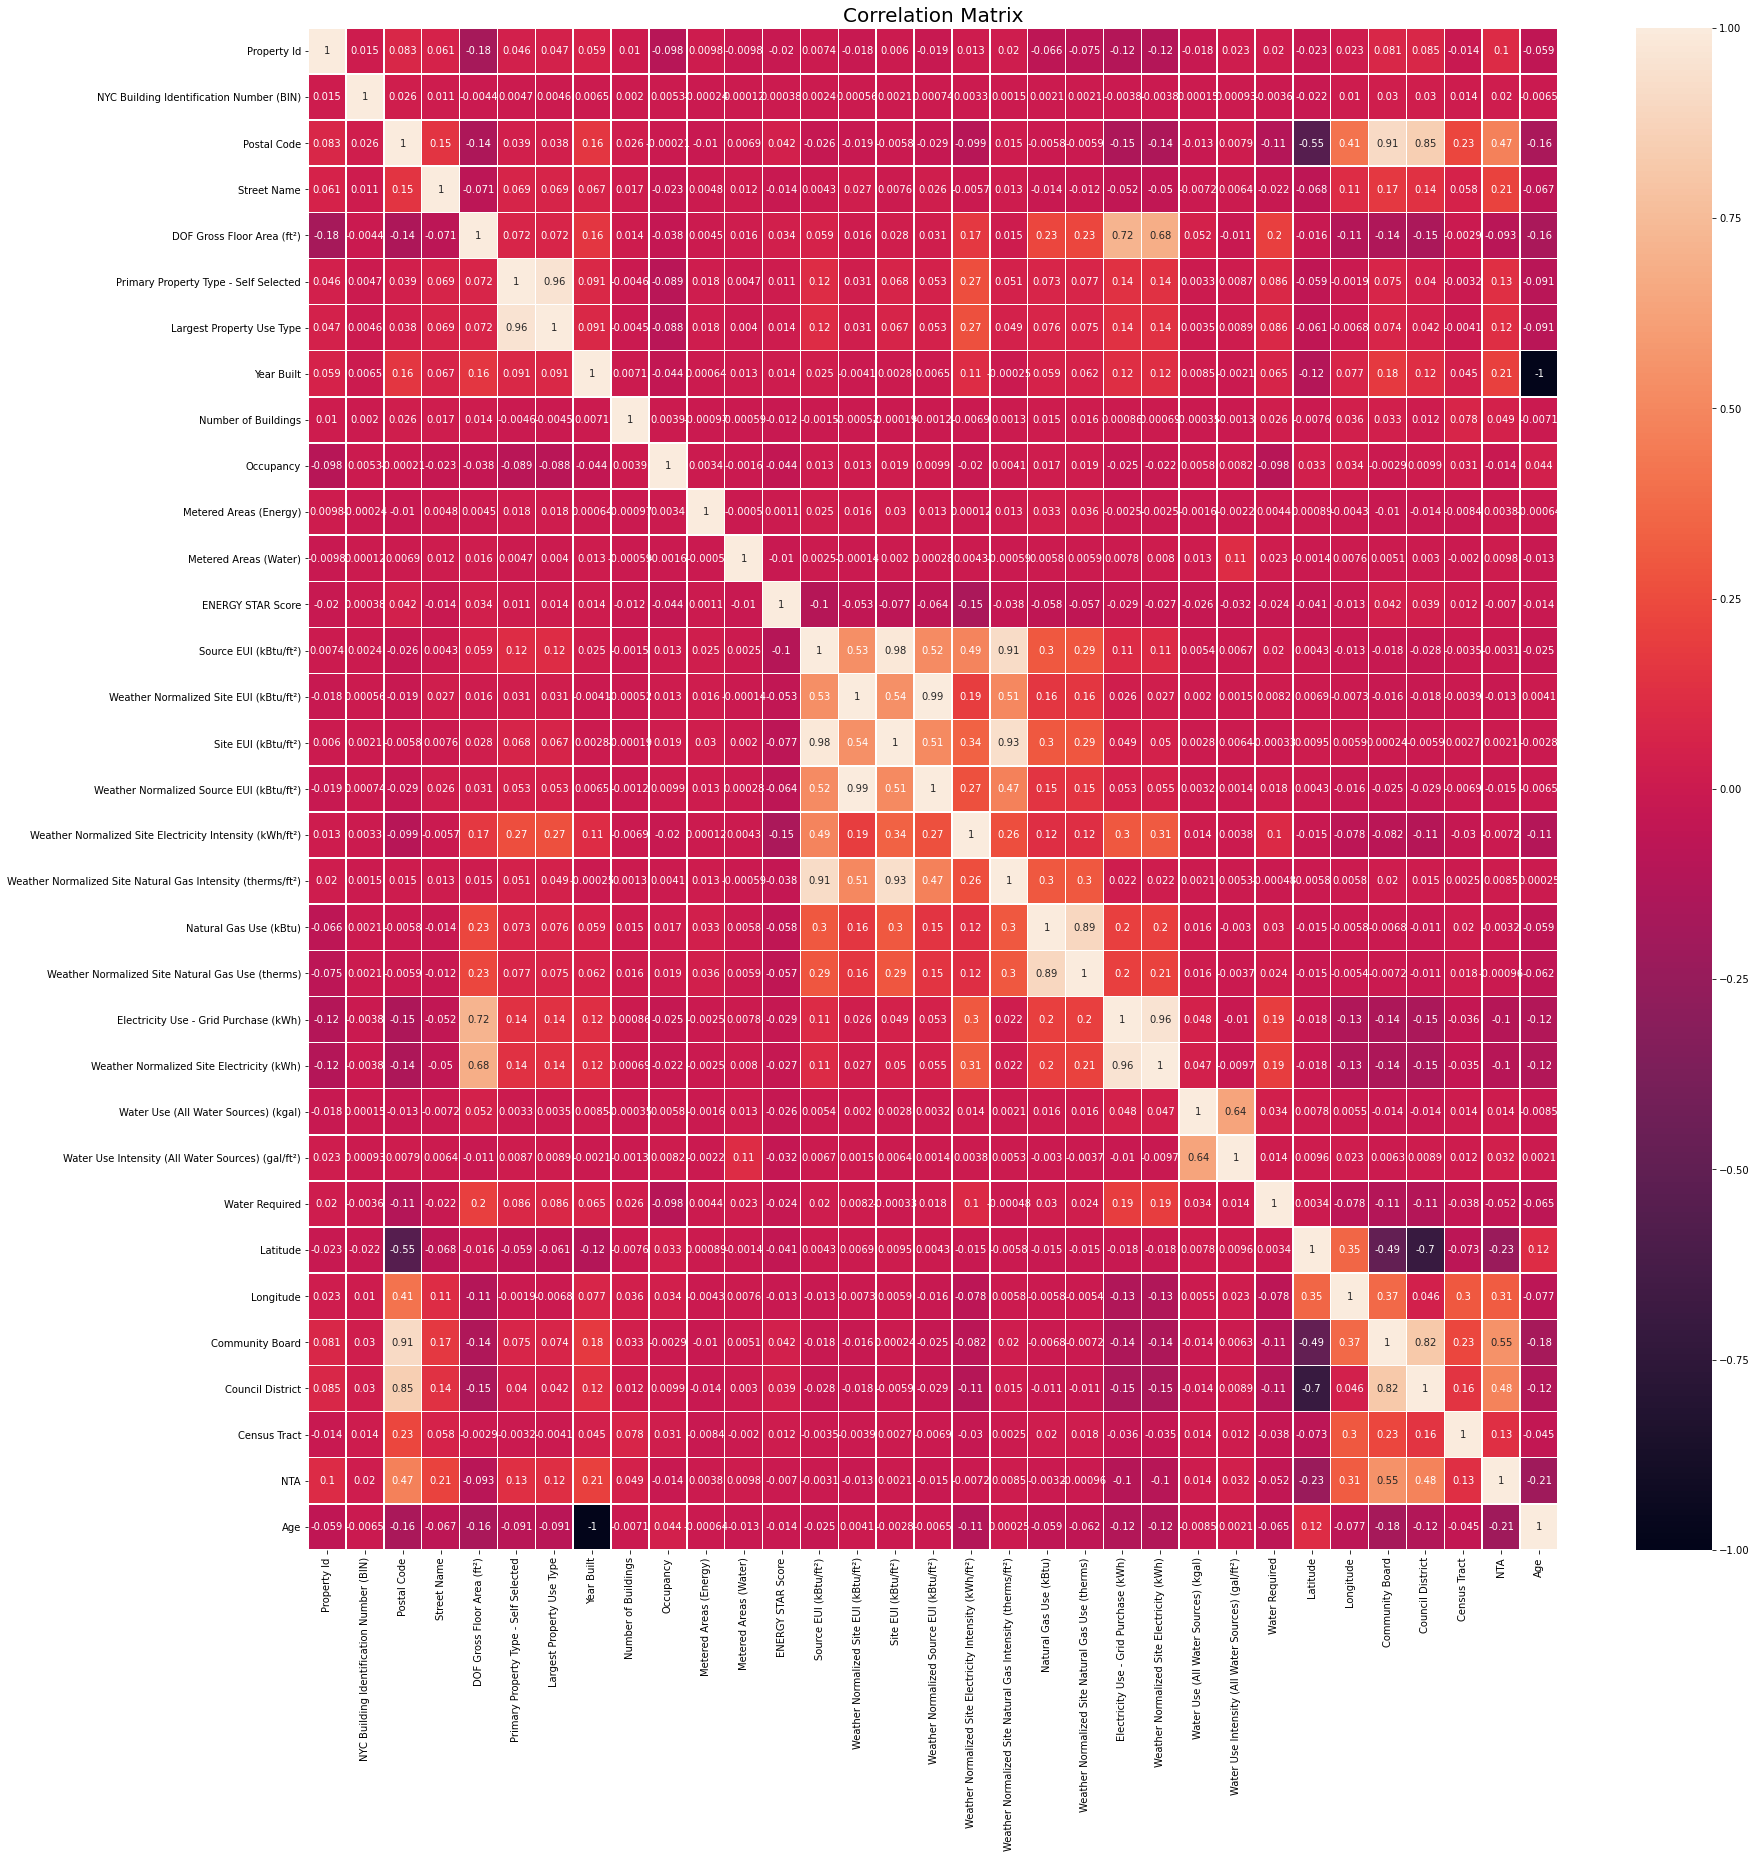

In [66]:
plt.figure(figsize=(28,28))
plt.title('Correlation Matrix',fontdict = {'fontsize' : 20})
H =sns.heatmap(Corr, annot=True,linewidths=.5)

In [67]:
# Splitting data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.333, random_state = 42)

# Feature Selection Using Embedded Method

Here we will do feature selection using Lasso regularization. If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken

In [68]:
reg = LassoCV()
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train,y_train))
coef = pd.Series(reg.coef_, index = X_train.columns)

Best alpha using built-in LassoCV: 5147.662453
Best score using built-in LassoCV: 0.426819


In [69]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 6 variables and eliminated the other 27 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

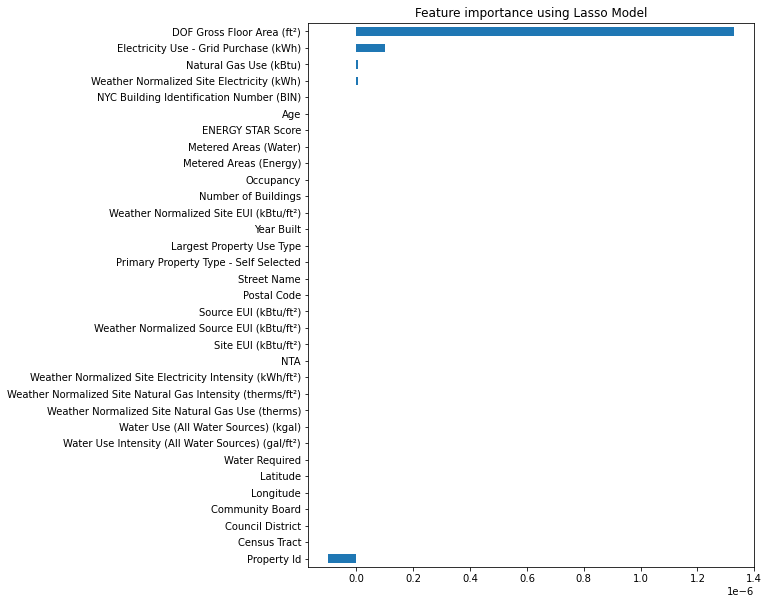

In [72]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

Using the 5 features from the above lasso model, the optimum r2 score was 0.77. Another feature selection method will be tried to see if a better result can be obtained.

# Feature Selection using Mutual Information Regression (MIR)

In [73]:
yt = [i for i in y_train]

included_features = [col for col in list(X)
                    if len([i for i in X[col].T.notnull() if i == True])==21759
                    and col!='Total GHG Emissions (Metric Tons CO2e)']

In [74]:
mir_result = fs.mutual_info_regression(X_train, yt) # mutual information regression feature ordering
feature_scores = []
for i in np.arange(len(included_features)):
    feature_scores.append([included_features[i],mir_result[i]])
sorted_scores = sorted(np.array(feature_scores), key=lambda s: float(s[1]), reverse=True) 
print(np.array(sorted_scores))

[['Natural Gas Use (kBtu)' '0.8135963920652611']
 ['Electricity Use - Grid Purchase (kWh)' '0.7910214857131388']
 ['Weather Normalized Site Natural Gas Use (therms)' '0.7798119488904844']
 ['Weather Normalized Site Electricity (kWh)' '0.7530930505151887']
 ['DOF Gross Floor Area (ft²)' '0.681663466302906']
 ['Site EUI (kBtu/ft²)' '0.37742976779829274']
 ['Source EUI (kBtu/ft²)' '0.35548382718562443']
 ['Weather Normalized Site EUI (kBtu/ft²)' '0.3349218446626243']
 ['Weather Normalized Source EUI (kBtu/ft²)' '0.3082264305608424']
 ['Water Use (All Water Sources) (kgal)' '0.23058475120612076']
 ['Property Id' '0.2235791389409032']
 ['NTA' '0.18414364757859492']
 ['Community Board' '0.15657444204607351']
 ['Council District' '0.1532265592901556']
 ['Postal Code' '0.1451179312165185']
 ['Weather Normalized Site Electricity Intensity (kWh/ft²)'
  '0.13827964055209563']
 ['Latitude' '0.12982738034251629']
 ['ENERGY STAR Score' '0.12502742118175192']
 ['NYC Building Identification Number (BI

In [75]:
ML_D = X[['Natural Gas Use (kBtu)',
          'Electricity Use - Grid Purchase (kWh)',
          'Weather Normalized Site Natural Gas Use (therms)',
          'Weather Normalized Site Electricity (kWh)',
          'Source EUI (kBtu/ft²)',
          'Weather Normalized Source EUI (kBtu/ft²)',
          'Weather Normalized Site EUI (kBtu/ft²)',
          'Property Id',
          'NTA',
          'Community Board',
          'Council District',
          'Postal Code',
          'ENERGY STAR Score',
          'Largest Property Use Type',
          'Age',
          'Water Use (All Water Sources) (kgal)',
          'DOF Gross Floor Area (ft²)',
          'NYC Building Identification Number (BIN)',
         ]]

# Checking for Multi-Collinearity

In [76]:
# VIF = 1, indicates no correlation between the independent variable and the other variables 
# VIF exceeding 5 or 10 indicates high multicollinearity between the independent variable and the others

def calc_vif(C):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = C.columns
    vif["VIF"] = [variance_inflation_factor(C.values, i) for i in range(C.shape[1])]

    return(vif)

In [77]:
C = ML_D.iloc[:,:]
calc_vif(C)

variables         VIF
0                             Natural Gas Use (kBtu)    5.290975
1              Electricity Use - Grid Purchase (kWh)   14.368813
2   Weather Normalized Site Natural Gas Use (therms)    5.312606
3          Weather Normalized Site Electricity (kWh)   13.173083
4                              Source EUI (kBtu/ft²)    1.913530
5           Weather Normalized Source EUI (kBtu/ft²)  117.448337
6             Weather Normalized Site EUI (kBtu/ft²)  117.611535
7                                        Property Id    6.970647
8                                                NTA    3.067748
9                                    Community Board   17.363525
10                                  Council District    7.737723
11                                       Postal Code   30.366188
12                                 ENERGY STAR Score    4.534594
13                         Largest Property Use Type    1.231388
14                                               Age    6.199880
15              Water Use (All Water Sources) (kgal)    1.019900
16                        DOF Gross Floor Area (ft²)    2.977067
17          NYC Building Identification Number (BIN)    1.007237

As seen from the above that there's high colliearity between the following;

- Electricity Use - Grid Purchase (kWh).
- Weather Normalized Site Electricity (kWh)
- Weather Normalized Source EUI (kBtu/ft²).
- Weather Normalized Site EUI (kBtu/ft²)
- Community Board
- Postal Code.

In [79]:
# Dropped some correlated features to reduce the multicollinearity between features

ML_ = X[['Natural Gas Use (kBtu)',
          'Electricity Use - Grid Purchase (kWh)',
          'DOF Gross Floor Area (ft²)',
          'Source EUI (kBtu/ft²)',
          'Weather Normalized Site EUI (kBtu/ft²)',
          'Water Use (All Water Sources) (kgal)',
          'Property Id',
          'NTA',
          'Council District',
          'ENERGY STAR Score',
          'NYC Building Identification Number (BIN)',
          'Largest Property Use Type',
          'Age',
         ]]

In [80]:
C = ML_.iloc[:,:]
calc_vif(C)

variables       VIF
0                     Natural Gas Use (kBtu)  1.244160
1      Electricity Use - Grid Purchase (kWh)  2.348607
2                 DOF Gross Floor Area (ft²)  2.796428
3                      Source EUI (kBtu/ft²)  1.817090
4     Weather Normalized Site EUI (kBtu/ft²)  1.453640
5       Water Use (All Water Sources) (kgal)  1.018582
6                                Property Id  4.684574
7                                        NTA  2.731374
8                           Council District  3.290321
9                          ENERGY STAR Score  3.699312
10  NYC Building Identification Number (BIN)  1.007140
11                 Largest Property Use Type  1.170081
12                                       Age  3.777563

In [81]:
ML_X = ML_.values
ML_Y = y.values

In [82]:
x_train, x_test, Y_train, Y_test = train_test_split(ML_X, ML_Y, test_size = 0.3, random_state = 42)

In [83]:
print('Training Features Shape:', x_train.shape)
print('Training Label Shape:', Y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Label Shape:', Y_test.shape)

Training Features Shape: (15231, 13)
Training Label Shape: (15231,)
Testing Features Shape: (6528, 13)
Testing Label Shape: (6528,)


# Model

# Task 1

# Random Forest Regression

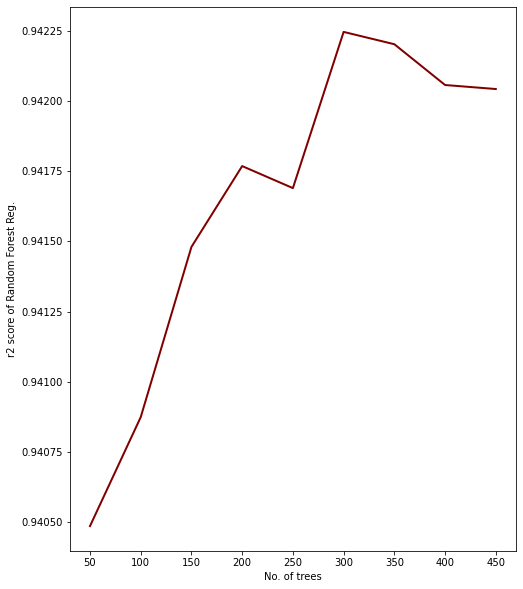

In [84]:
# Finding out the optimal number of trees for Random Forest Regression


forestRange=range(50,500,50)
scores_list=[]
for i in forestRange: 
    regressor_Forest = RandomForestRegressor(n_estimators=i,random_state=42)
    regressor_Forest.fit(x_train,Y_train)
    Y_pred = regressor_Forest.predict(x_test)
    scores_list.append(r2_score(Y_test,Y_pred))
plt.plot(forestRange,scores_list,linewidth=2,color='maroon')
plt.xticks(forestRange)
plt.xlabel('No. of trees')
plt.ylabel('r2 score of Random Forest Reg.')
plt.show()

From the above, the optimal number of trees that gave the highest r2score (.9422) was 300, but at 150 trees the r2scores is (0.94205). The difference between the two scores is less than 0.1% therefore, 150 trees will be selected rather than 300 trees, as this will save computational cost.

In [85]:
# Training the Random Forest regression on the training model

regressor_Forest = RandomForestRegressor(n_estimators=150,random_state=42)
regressor_Forest.fit(x_train,Y_train)
Y_pred = regressor_Forest.predict(x_test)
r2_forest = r2_score(Y_test,Y_pred)
print(r2_forest)

0.9414805345428746


In [86]:
print(Y_pred)

[5.36292676 5.95042555 5.33328059 ... 5.97262491 6.57542164 1.98459545]


In [87]:
# Transform the data from log back to base 10

Y_Pred = np.exp(Y_pred)
Y_Test = np.exp(Y_test)

In [88]:
print(Y_Pred)

[213.34845349 383.9166811  207.11632368 ... 392.53468893 717.24798291
   7.27610322]


In [89]:
Result = pd.DataFrame({'Actual GHG': Y_Test.flatten(), 'Predicted GHG': Y_Pred.flatten()})

In [90]:
Result

Actual GHG  Predicted GHG
0          210.0     213.348453
1          396.0     383.916681
2          209.0     207.116324
3          234.0     277.232445
4          922.0     899.854996
...          ...            ...
6523       286.0     285.089453
6524       137.0     137.027751
6525       381.0     392.534689
6526       720.0     717.247983
6527        11.0       7.276103

[6528 rows x 2 columns]

In [91]:
mean_absolute_error = metrics.mean_absolute_error(Y_Test, Y_Pred)
print("Mean_Absolute_Error: " + str(mean_absolute_error))

Mean_Absolute_Error: 73.22760882449678


In [92]:
mean_squared_error = metrics.mean_squared_error(Y_Test, Y_Pred)
print("Mean_Squared_Error: " + str (mean_squared_error))

Mean_Squared_Error: 459897.52581234655


In [93]:
 np.sqrt(metrics.mean_squared_error(Y_Test, Y_Pred))

678.1574491313552

# Anomaly Detection using Isolation Forest

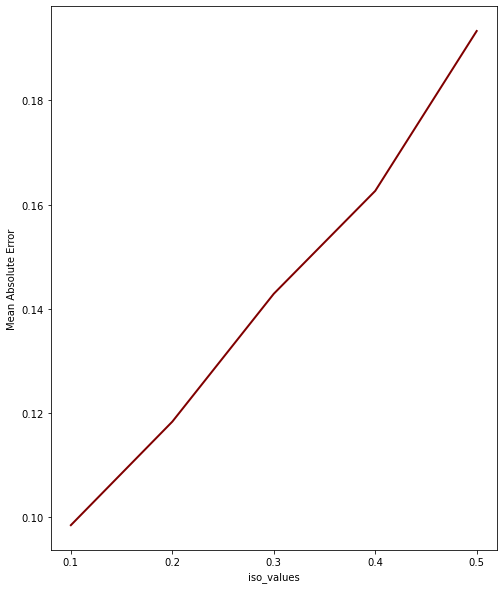

In [94]:
# Finding the optimal iso-value that results in the least mean aboslute error

iso_values = range(1,6,1)
MAE_list=[] # Mean Absolute Error
contamination = []

for i in iso_values:
    iso = IsolationForest(contamination = i/10) # Contamination value from 0 to 0.5
    pred = iso.fit_predict(x_train)
    
    # Selecting all rows that are not outliers
    non_outliers = pred != -1
    Xtrain, Ytrain = x_train[non_outliers, :], Y_train[non_outliers]
    
    # fit the model
    model = RandomForestRegressor(n_estimators=150,random_state=42)
    model.fit(Xtrain, Ytrain) # Fitting model to data without outlier
    

    # evaluate the model
    predd = model.predict(x_test)
    

    # evaluate predictions
    MAE = metrics.mean_absolute_error(Y_test, predd)
    MAE
    
    MAE_list.append(MAE)
    contamination.append(i/10)
    
plt.plot(contamination, MAE_list,linewidth=2,color='maroon')
plt.xticks(contamination)
plt.xlabel('iso_values')
plt.ylabel('Mean Absolute Error')
plt.show()

In [95]:
# Re-training the model using the non-outlier training data

iso = IsolationForest(contamination = 0.1) # Using the Optimum contamination value
pred = iso.fit_predict(x_train)
    
non_outliers = pred != -1
Xtrain, Ytrain = x_train[non_outliers, :], Y_train[non_outliers]


regressor_Forest = RandomForestRegressor(n_estimators=150,random_state=42)
regressor_Forest.fit(Xtrain, Ytrain)

# Predicting test results
_predict = regressor_Forest.predict(x_test)

# Calculating r2 score
New_r2_Score = r2_score(Y_test, _predict)
print(New_r2_Score)

New_mean_absolute_error_forest = metrics.mean_absolute_error(Y_test, _predict)
New_mean_absolute_error_forest

0.9223527268684544


0.10214575288616724

In [96]:
print('Training Features Shape:', x_train.shape)
print('Training Features Shape (without Outliers):', Xtrain.shape)
print('Training Label Shape:', Y_train.shape)
print('Training Label Shape (without Outliers):', Ytrain.shape)

Training Features Shape: (15231, 13)
Training Features Shape (without Outliers): (13708, 13)
Training Label Shape: (15231,)
Training Label Shape (without Outliers): (13708,)


# Comparison

<AxesSubplot:>

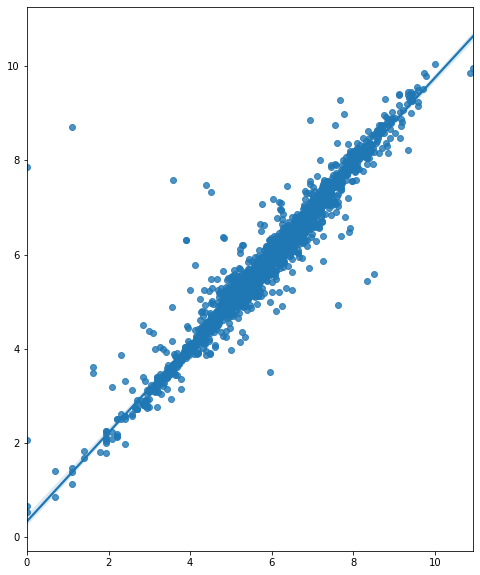

In [97]:
# Regression Plot before removal of outliers

sns.regplot(Y_test, Y_pred)

In [98]:
# Regression Plot after removal of outliers

sns.regplot(Y_test, predict)

NameError: name 'predict' is not defined

In [ ]:
# Comparison Plot

comparison = [' With Outliers', 'Without Outliers']
r2scores = [r2_forest, New_r2_Score]
for item in range (len(r2scores)):
    r2scores[item]=np.round(r2scores[item]*100,decimals=3)
error = [mean_absolute_error, New_mean_absolute_error_forest]

In [ ]:
# r2score comparison

plt.figure(figsize=(5,10))
ax = sns.barplot(x=comparison,y=r2scores)
plt.yticks(np.arange(0, 110, step=10))
plt.title('r2 score, before and after removal of Outliers.',fontweight='bold')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}%'.format(height), (x +0.25, y + height + 0.25))
    
plt.show()

In [ ]:
# Mean Absolute Error Comparison 

plt.figure(figsize=(5,10))
ax = sns.barplot(x=comparison,y=error)
plt.yticks(np.arange(0, 110, step=10))
plt.title('Mean Absolute Error, before and after removal of Outliers',fontweight='bold')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}'.format(height), (x +0.25, y + height + 0.25))
    
plt.show()

With the removal of Outliers, the mean squared error reduced significantly from 72.57 to 0.10, but the r2score of the model also reduced. This might be due to the reduction in training data after removal of outliers. 

# Task 2 (Classification)

In [ ]:
df_Class = df

In [ ]:
df_Score = pd.cut(df_Class['ENERGY STAR Score'], [0, 25, 74, 100], labels = ["Red", "Yellow", "Green"]) # Creates label Red, Yellow and Green based on Energy Start Score

In [ ]:
Color_Code = pd.concat([df_Score], axis = 1)
Colour_Rating = Color_Code.groupby('ENERGY STAR Score').size().reset_index(name='count')

fig = px.pie(Colour_Rating, values='count', names='ENERGY STAR Score', title='Energy STAR Color Rating', color='ENERGY STAR Score', color_discrete_map={'Red':'red', 'Green':'green', 'Yellow':'yellow'})
fig.show()


21% have a POOR Energy STAR score, between (0 - 25).
48.7% have a POOR - GOOD Energy STAR score, between (26 - 74).
30.2% have a GREAT Energy Star Score, between (75 - 100). 

In [ ]:
#Using the defined function (getObjectFeature) to convert Categorical data to Numeric

for col in list(df_Class):
    if df_Class[col].dtype=='object':
        df_Class = getObjectFeature(df_Class, col)
df_Class.head(10)

In [ ]:
df_Class.info()

In [ ]:
Cor = df_Class.corr()

In [ ]:
plt.figure(figsize=(28,28))
plt.title('Correlation Matrix',fontdict = {'fontsize' : 20})
H =sns.heatmap(Cor, annot=True,linewidths=.5)

In [ ]:
target_cor = Cor['ENERGY STAR Score']
target_cor

The above shows that there's no signifcant correlation between the Energy Star Score and other features.

In [ ]:
X_Class = df_Class.drop(['ENERGY STAR Score'], axis=1)
y_Class = df_Score

In [ ]:
X__train, X__test, Y__train, Y__test = train_test_split(X_Class, y_Class, test_size=0.3, random_state=42)

In [ ]:
from sklearn import tree
from sklearn.metrics import classification_report

In [ ]:
d_tree = tree.DecisionTreeClassifier()
d_tree.fit(X__train, Y__train)

In [ ]:
Y__Pred = d_tree.predict(X__test)

In [ ]:
cr = classification_report(Y__test, Y__Pred)
print('\nClassification Report Table:' f'\n{cr}')
